In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
plt.rcParams['font.family'] = 'NanumGothic'

In [7]:
location = pd.read_csv("영업소찾기 (1).csv")

In [50]:
time = pd.read_csv("2019-2023통행시간 (5).csv", encoding="cp949")

In [51]:
location

,본부,지사,영업소,주소,우편번호(5자리),영업소코드,영업소명
0,수도권,시흥,서서울,경기도 안산시 상록구 장하로 141-2,15208.0,253,서서울
1,수도권,군포,군자,경기도 시흥시 군자로335번길 36-29,15004.0,254,군자
2,수도권,군포,서안산,경기도 안산시 단원구 시흥대로 19-30,15210.0,255,서안산
3,수도권,군포,안산,경기도 안산시 오리골길 15-1,15208.0,256,안산
4,수도권,군포,군포,경기도 군포시 영동고속도로 26,15884.0,215,군포
...,...,...,...,...,...,...,...
446,NaN,NaN,NaN,경상북도 칠곡군,NaN,774,남칠곡
447,NaN,NaN,NaN,대구광역시,NaN,775,동명동호
448,NaN,NaN,NaN,대구광역시,NaN,776,연경
449,NaN,NaN,NaN,대구광역시,NaN,777,파군재


In [52]:
time

,날짜,시,도착,통행,ymd
0,20190201,0,101,-1,2019020100000
1,20190201,0,102,552,2019020100000
2,20190201,0,103,447,2019020100000
3,20190201,0,105,588,2019020100000
4,20190201,0,106,926,2019020100000
...,...,...,...,...,...
182641,20230126,23,772,14843,20230126230000
182642,20230126,23,835,1003,20230126230000
182643,20230126,23,837,1078,20230126230000
182644,20230126,23,851,3848,20230126230000


In [53]:
time.columns=["집계일자","집계시","도착영업소코드","통행시간","ymd"]

In [54]:
df = pd.merge(location, time, left_on="영업소코드", right_on="도착영업소코드", how="right")
df

,본부,지사,영업소,주소,우편번호(5자리),영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간,ymd
0,수도권,수원,서울,경기도 성남시 분당구 대왕판교로 240 (궁내동),13550.0,101,서울,20190201,0,101,-1,2019020100000
1,수도권,군포,동수원,경기도 수원시 영통구 영동고속도로 36,16226.0,102,동수원,20190201,0,102,552,2019020100000
2,수도권,수원,수원신갈,경기도 용인시 기흥구 하갈로 240 (상갈동),17096.0,103,수원신갈,20190201,0,103,447,2019020100000
3,수도권,수원,기흥,경기도 용인시 기흥구 기흥단지로 7 (고매동),17086.0,105,기흥,20190201,0,105,588,2019020100000
4,수도권,수원,오산,경기도 오산시 원동로 105(원동),18150.0,106,오산,20190201,0,106,926,2019020100000
...,...,...,...,...,...,...,...,...,...,...,...,...
182641,NaN,NaN,NaN,대구광역시,NaN,772,북달성,20230126,23,772,14843,20230126230000
182642,NaN,NaN,NaN,경기도 용인시,NaN,835,서용인,20230126,23,835,1003,20230126230000
182643,NaN,NaN,NaN,경상남도,NaN,837,중리,20230126,23,837,1078,20230126230000
182644,NaN,NaN,NaN,충청북도 청주,NaN,851,서오창,20230126,23,851,3848,20230126230000


In [55]:
df = df.drop(["본부", "지사", "영업소", "우편번호(5자리)"], axis=1)
df

,주소,영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간,ymd
0,경기도 성남시 분당구 대왕판교로 240 (궁내동),101,서울,20190201,0,101,-1,2019020100000
1,경기도 수원시 영통구 영동고속도로 36,102,동수원,20190201,0,102,552,2019020100000
2,경기도 용인시 기흥구 하갈로 240 (상갈동),103,수원신갈,20190201,0,103,447,2019020100000
3,경기도 용인시 기흥구 기흥단지로 7 (고매동),105,기흥,20190201,0,105,588,2019020100000
4,경기도 오산시 원동로 105(원동),106,오산,20190201,0,106,926,2019020100000
...,...,...,...,...,...,...,...,...
182641,대구광역시,772,북달성,20230126,23,772,14843,20230126230000
182642,경기도 용인시,835,서용인,20230126,23,835,1003,20230126230000
182643,경상남도,837,중리,20230126,23,837,1078,20230126230000
182644,충청북도 청주,851,서오창,20230126,23,851,3848,20230126230000


In [56]:
df["ymd"] = pd.to_datetime(df["ymd"], format="%Y%m%d%H%M%S")

# 부산

In [58]:
busan = df[df["주소"].str.contains('부산광역시', na=False)]
busan

,주소,영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간,ymd
26,부산광역시 금정구 고분로 148,140,부산,20190201,0,140,14771,2019-02-01 00:00:00
66,부산광역시 강서구,244,서부산,20190201,0,244,16306,2019-02-01 00:00:00
154,부산광역시 금정구 고분로 148,140,부산,20190201,1,140,14982,2019-02-01 10:00:00
155,부산광역시 강서구 남해고속도로 281,150,북부산,20190201,1,150,14291,2019-02-01 10:00:00
199,부산광역시 강서구,244,서부산,20190201,1,244,15839,2019-02-01 10:00:00
...,...,...,...,...,...,...,...,...
182234,부산광역시 기장군 철마면 백길리 29번지,752,기장철마,20230126,20,752,-1,2023-01-26 20:00:00
182235,부산광역시,760,기장서JC,20230126,20,760,-1,2023-01-26 20:00:00
182271,부산광역시 금정구 고분로 148,140,부산,20230126,21,140,16269,2023-01-26 21:00:00
182322,부산광역시 강서구,244,서부산,20230126,21,244,15940,2023-01-26 21:00:00


In [20]:
# busan[busan["영업소명"]=="북부산" | busan["집계시"]==""]

,주소,영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간
42,부산광역시 강서구 남해고속도로 281,150,북부산,20190205,9,150,-1
3801,부산광역시 강서구 남해고속도로 281,150,북부산,20190201,3,150,14717
3829,부산광역시 강서구 남해고속도로 281,150,북부산,20190201,2,150,14764
3958,부산광역시 강서구 남해고속도로 281,150,북부산,20190201,1,150,14291
4138,부산광역시 강서구 남해고속도로 281,150,북부산,20190201,4,150,14670
...,...,...,...,...,...,...,...
176551,부산광역시 강서구 남해고속도로 281,150,북부산,20230126,19,150,15994
177296,부산광역시 강서구 남해고속도로 281,150,북부산,20230126,18,150,16125
177684,부산광역시 강서구 남해고속도로 281,150,북부산,20230126,16,150,15826
177882,부산광역시 강서구 남해고속도로 281,150,북부산,20230126,17,150,16167


In [21]:
# busan[busan["통행시간"]==-1]

,주소,영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간
42,부산광역시 강서구 남해고속도로 281,150,북부산,20190205,9,150,-1
76,부산광역시 강서구,244,서부산,20190205,23,244,-1
127,부산광역시 금정구 고분로93번길 51,529,노포,20190205,8,529,-1
128,부산광역시 금정구 고분로93번길 51,529,노포,20190205,7,529,-1
188,부산광역시 기장군 장안읍 기장대로 1561-67,645,장안,20190205,1,645,-1
...,...,...,...,...,...,...,...
174094,부산광역시 기장군 기장읍 기장대로 116-125,647,해운대송정,20230126,18,647,-1
174125,부산광역시 강서구,596,가락2,20230126,19,596,-1
174157,부산광역시 기장군 철마면 백길리 29번지,752,기장철마,20230126,20,752,-1
174158,부산광역시,760,기장서JC,20230126,20,760,-1


In [54]:
# busan["date"] = busan["집계일자"] + busan["집계시"]

C:\Users\Yoona Lim\AppData\Local\Temp\ipykernel_19384\1484057733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan["date"] = str(busan["집계일자"]) + str(busan["집계시"])


In [81]:
# busan["집계시"] = pd.to_datetime(busan["집계시"], format='%H')

C:\Users\Yoona Lim\AppData\Local\Temp\ipykernel_19384\3113356565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan["집계시"] = pd.to_datetime(busan["집계시"], format='%H')


In [60]:
#busan["집계일자"] = pd.to_datetime(busan["집계일자"], format='%Y%m%d%H%M%S')
busan["year"] = busan["ymd"].dt.year
busan["MonthDay"] = busan["ymd"].dt.strftime('%m-%d')

C:\Users\Yoona Lim\AppData\Local\Temp\ipykernel_14360\3993889747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan["year"] = busan["ymd"].dt.year
C:\Users\Yoona Lim\AppData\Local\Temp\ipykernel_14360\3993889747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan["MonthDay"] = busan["ymd"].dt.strftime('%m-%d')


In [64]:
tmp = busan[busan["영업소명"]=="노포"].sort_values(["ymd"])
tmp2019= tmp[tmp["year"]==2019]
tmp2019 = tmp2019[tmp2019.통행시간 != -1]

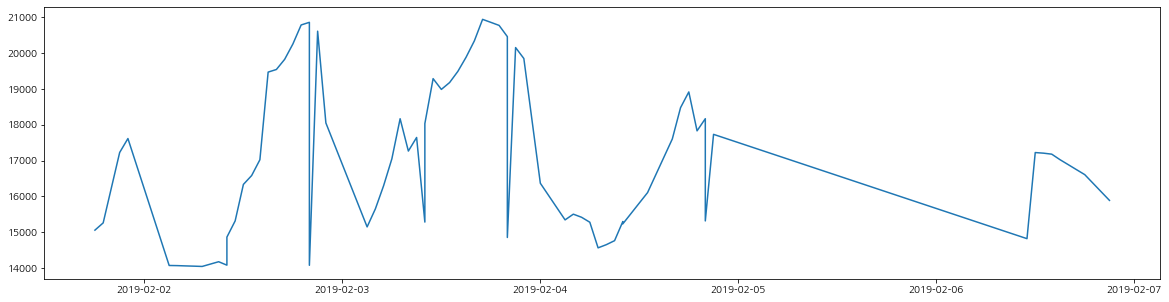

In [66]:
plt.figure(figsize=(20,5))
plt.plot(tmp2019["ymd"], tmp2019["통행시간"])

In [72]:
busan[busan["통행시간"]==-1]

,주소,영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간,ymd,year,MonthDay
1700,부산광역시 강서구,596,가락2,20190201,10,596,-1,2019-02-01 10:00:00,2019,02-01
1724,부산광역시 기장군 장안읍 기장대로 1561-67,645,장안,20190201,10,645,-1,2019-02-01 10:00:00,2019,02-01
2689,부산광역시 기장군 장안읍 기장대로 1561-67,645,장안,20190201,14,645,-1,2019-02-01 14:00:00,2019,02-01
2714,부산광역시,751,기장일광(KEC),20190201,14,751,-1,2019-02-01 14:00:00,2019,02-01
3220,부산광역시 기장군 기장읍 기장대로 116-125,647,해운대송정,20190201,16,647,-1,2019-02-01 16:00:00,2019,02-01
...,...,...,...,...,...,...,...,...,...,...
181641,부산광역시 기장군 철마면 백길리 29번지,752,기장철마,20230126,17,752,-1,2023-01-26 17:00:00,2023,01-26
181825,부산광역시 기장군 기장읍 기장대로 116-125,647,해운대송정,20230126,18,647,-1,2023-01-26 18:00:00,2023,01-26
182009,부산광역시 강서구,596,가락2,20230126,19,596,-1,2023-01-26 19:00:00,2023,01-26
182234,부산광역시 기장군 철마면 백길리 29번지,752,기장철마,20230126,20,752,-1,2023-01-26 20:00:00,2023,01-26


In [89]:
busan2019 = busan[busan["year"]==2019]

In [90]:
busan2 = busan2019[busan2019["통행시간"]!=-1]

In [91]:
busan3 = busan2.groupby("ymd")["통행시간"].mean()

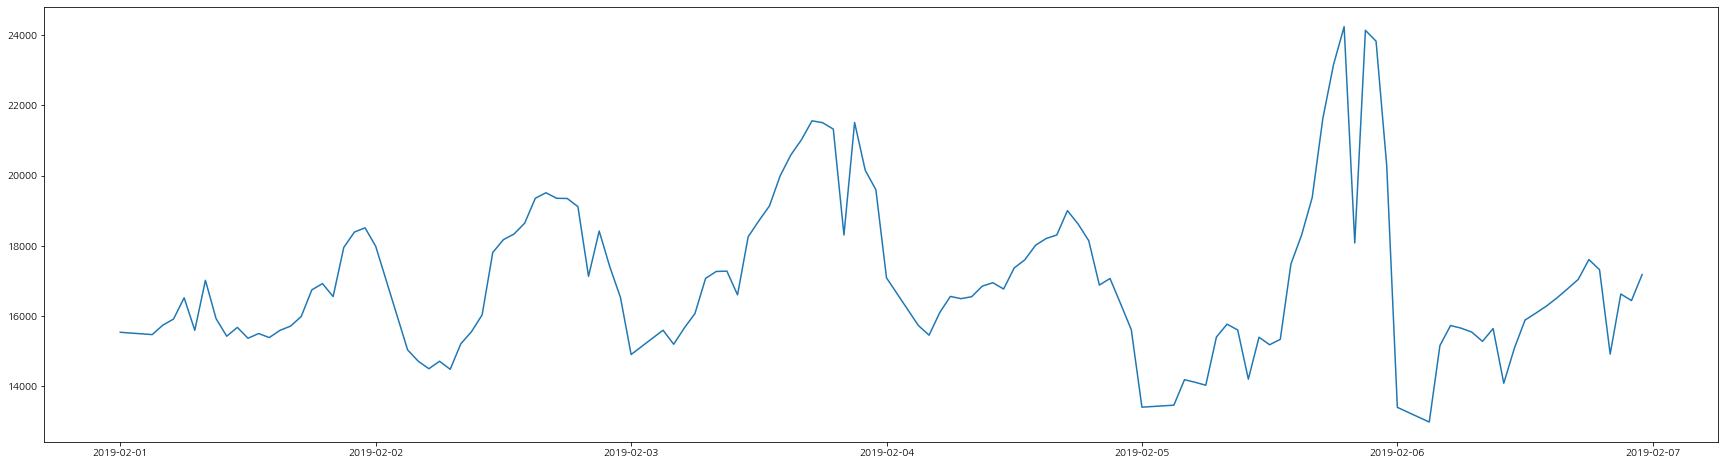

In [92]:
plt.figure(figsize=(30,8))
plt.plot(busan3)

# 해야할것
- x축에 시간도 포함시켜서 하기
- 연도별로 (색깔 다르게 비교)
    - 2019 ~ 2023
- 지역별로 (각 plot으로)
    - 대구, 부산, 울산, 강릉, 대전

유나 - 대구,부산,울산

유진 - 강릉,대전